# FastF1 Classification Baseline

This notebook loads the dataset and trains a simple logistic regression baseline.

In [1]:
import pandas as pd
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
    accuracy_score,
)
from sklearn.metrics import balanced_accuracy_score


In [2]:
CAT_COLS = [
    'driver_id',
    'constructor_id',
    'circuit_id',
]
NUM_COLS = [
    'grid_position',
    'quali_delta',
    'quali_tm_delta',
    'season_pts_driver',
    'season_pts_team',
    'last_3_avg',
    'is_street_circuit',
    'is_wet',
]
TARGET = 'points_scored'



In [3]:
preprocess = ColumnTransformer(
    [
        ('cat', OneHotEncoder(handle_unknown='ignore'), CAT_COLS),
        (
            'num',
            make_pipeline(SimpleImputer(strategy='median'), StandardScaler()),
            NUM_COLS,
        ),
    ],
)

train_df = pd.read_csv("../data/grandprix_features_train.csv")
val_df   = pd.read_csv("../data/grandprix_features_val.csv") 
test_df  = pd.read_csv("../data/grandprix_features_test.csv")

X_train, y_train = train_df[CAT_COLS + NUM_COLS], train_df[TARGET]
X_val,   y_val   = val_df[CAT_COLS + NUM_COLS],   val_df[TARGET]
X_test,  y_test  = test_df[CAT_COLS + NUM_COLS],  test_df[TARGET]

X_train.shape, X_val.shape, X_test.shape

((3740, 11), (479, 11), (479, 11))

In [ ]:
log_reg = make_pipeline(
    preprocess,
    LogisticRegression(max_iter=300, class_weight='balanced', n_jobs=-1),
)

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_val)
y_proba = log_reg.predict_proba(X_val)[:, 1]

print("Acc", accuracy_score(y_val, y_pred))
print('Precision:', precision_score(y_val, y_pred))
print('Recall:', recall_score(y_val, y_pred))
print('F1 (binary):', f1_score(y_val, y_pred))
print('F1 (macro):', f1_score(y_val, y_pred, average="macro"))
print('Balanced accuracy:', balanced_accuracy_score(y_val, y_pred))

Acc 0.8183716075156576
Precision: 0.8148148148148148
Recall: 0.825
F1 (binary): 0.8198757763975155
F1 (macro): 0.8183589408303367
Balanced accuracy: 0.818357740585774


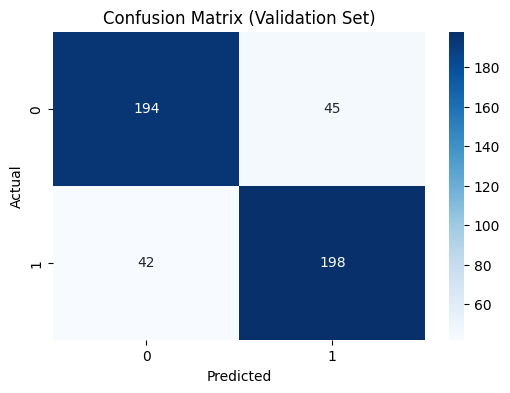

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Validation Set)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()
